In [1]:
import time
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('amazon_after_process_no_scale.csv')

In [3]:
df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
0,39353,85475,117961,118300,123472,117905,117906,290919,117908,1
1,17183,1540,117961,118343,123125,118536,118536,308574,118539,1
2,36724,14457,118219,118220,117884,117879,267952,19721,117880,1
3,36135,5396,117961,118343,119993,118321,240983,290919,118322,1
4,42680,5905,117929,117930,119569,119323,123932,19793,119325,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61744 entries, 0 to 61743
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          61744 non-null  int64
 1   MGR_ID            61744 non-null  int64
 2   ROLE_ROLLUP_1     61744 non-null  int64
 3   ROLE_ROLLUP_2     61744 non-null  int64
 4   ROLE_DEPTNAME     61744 non-null  int64
 5   ROLE_TITLE        61744 non-null  int64
 6   ROLE_FAMILY_DESC  61744 non-null  int64
 7   ROLE_FAMILY       61744 non-null  int64
 8   ROLE_CODE         61744 non-null  int64
 9   target            61744 non-null  int64
dtypes: int64(10)
memory usage: 4.7 MB


In [5]:
#get all feature names
feature_names = df.columns[0:9].tolist()
print(feature_names)

['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


In [6]:
#split features and target
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

print(X)
print(y)

       RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0         39353   85475         117961         118300         123472   
1         17183    1540         117961         118343         123125   
2         36724   14457         118219         118220         117884   
3         36135    5396         117961         118343         119993   
4         42680    5905         117929         117930         119569   
...         ...     ...            ...            ...            ...   
61739     24290   15484         118256         118257         118623   
61740     43234    3239         119527         119599         119655   
61741     80795    2033         117961         118330         118509   
61742     12576    4466         118135         118139          13628   
61743     34702    2859         118791         118819         118840   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          

In [7]:
scaler = MinMaxScaler()

for i in feature_names:
    column_data = df[i].values.reshape(-1, 1)
    scaled_column = scaler.fit_transform(column_data)
    df[i] = scaled_column.flatten()

df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
0,0.126070,0.274167,0.370395,0.359379,0.421093,0.000134,0.368604,0.942199,0.000183,1
1,0.055047,0.004861,0.370395,0.359543,0.419863,0.003387,0.370655,1.000000,0.004313,1
2,0.117647,0.046305,0.371236,0.359075,0.401286,0.000000,0.857045,0.054318,0.000000,1
3,0.115761,0.017233,0.370395,0.359543,0.408762,0.002278,0.769253,0.942199,0.002892,1
4,0.136728,0.018866,0.370291,0.357972,0.407259,0.007444,0.388220,0.054553,0.009456,1


In [8]:
min_values = X.min()
max_values = X.max()

print(min_values)
print(max_values)

RESOURCE                 0
MGR_ID                  25
ROLE_ROLLUP_1         4292
ROLE_ROLLUP_2        23779
ROLE_DEPTNAME         4674
ROLE_TITLE          117879
ROLE_FAMILY_DESC      4673
ROLE_FAMILY           3130
ROLE_CODE           117880
dtype: int64
RESOURCE            312153
MGR_ID              311696
ROLE_ROLLUP_1       311178
ROLE_ROLLUP_2       286791
ROLE_DEPTNAME       286792
ROLE_TITLE          311867
ROLE_FAMILY_DESC    311867
ROLE_FAMILY         308574
ROLE_CODE           270691
dtype: int64


In [9]:
#split features and target
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

print(X)
print(y)

       RESOURCE    MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0      0.126070  0.274167       0.370395       0.359379       0.421093   
1      0.055047  0.004861       0.370395       0.359543       0.419863   
2      0.117647  0.046305       0.371236       0.359075       0.401286   
3      0.115761  0.017233       0.370395       0.359543       0.408762   
4      0.136728  0.018866       0.370291       0.357972       0.407259   
...         ...       ...            ...            ...            ...   
61739  0.077814  0.049600       0.371356       0.359216       0.403905   
61740  0.138503  0.010312       0.375498       0.364318       0.407564   
61741  0.258831  0.006443       0.370395       0.359493       0.403501   
61742  0.040288  0.014249       0.370962       0.358767       0.031738   
61743  0.111170  0.009093       0.373099       0.361352       0.404675   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0        0.000134          0.368604     0.942199 

NGHI THỨC HOLD-OUT

In [ ]:
# @title KNN

# Số lần chạy thử nghiệm
NUM_ITERATIONS = 15

def KNN_algorithm():
    training_times = []
    inference_times = []
    precisions = []
    recalls = []
    f1_scores = []

    for i in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
        model = KNeighborsClassifier(n_neighbors=11)

        start_time = time.time() # Bắt đầu đo thời gian
        model.fit(X_train, y_train)
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)

        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

KNN_algorithm()

Precision: 0.8643203079001122
Recall: 0.8496720937280666
F1 score: 0.8485863423663311
Training time: 0.09118908246358236
Inference time: 1.4100382169087728


In [ ]:
# @title Bayes
# Số lần chạy thử nghiệm
NUM_ITERATIONS = 15

def bayes_algorithm():
    training_times = []
    inference_times = []
    precisions = []
    recalls = []
    f1_scores = []

    for i in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
        model = GaussianNB()

        start_time = time.time() # Bắt đầu đo thời gian
        model.fit(X_train, y_train)
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)

        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

bayes_algorithm()

Precision: 0.54745844634399
Recall: 0.5188915105512378
F1 score: 0.4347053670731587
Training time: 0.01229097048441569
Inference time: 0.0023324171702067058


In [ ]:
# @title Decision Tree
# Số lần chạy thử nghiệm
NUM_ITERATIONS = 15

def decision_tree_algorithm():
    print("Decision Tree")
    training_times = []
    inference_times = []
    precisions = []
    recalls = []
    f1_scores = []

    for i in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
        model = DecisionTreeClassifier(criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=6, random_state=42)

        start_time = time.time() # Bắt đầu đo thời gian
        model.fit(X_train, y_train)
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)

        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

decision_tree_algorithm()

Decision Tree
Precision: 0.9308345734254703
Recall: 0.9307992602063594
F1 score: 0.9307693518045475
Training time: 0.41417808532714845
Inference time: 0.005901463826497396


In [13]:
# @title Random Forest
# Số lần chạy thử nghiệm
NUM_ITERATIONS = 15

def random_forest_algorithm():
    print("Random Forest")
    training_times = []
    inference_times = []
    precisions = []
    recalls = []
    f1_scores = []

    for i in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
        model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=200,  min_samples_split=5, min_samples_leaf=10, random_state=42)

        start_time = time.time() # Bắt đầu đo thời gian
        model.fit(X_train, y_train)
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)

        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

random_forest_algorithm()

Random Forest
Precision: 0.9547199324242894
Recall: 0.9545396188266274
F1 score: 0.9545487565845345
Training time: 17.281989669799806
Inference time: 0.4034509817759196


In [ ]:
def predict_new_instance_min_max_scaled(model, new_data, min_values, max_values):
    # Chuyển đổi new_data thành DataFrame nếu nó không phải là DataFrame
    if not isinstance(new_data, pd.DataFrame):
        new_data = pd.DataFrame([new_data], columns=model.feature_names_in_)

    # Min-Max Scaling cho dữ liệu mới
    scaled_new_data = (new_data - min_values) / (max_values - min_values)

    # Dự đoán kết quả cho phần tử mới
    prediction = model.predict(scaled_new_data)

    return prediction

def random_forest_predict():
    print("Random Forest")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    model = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=100,  min_samples_split=3, min_samples_leaf=6, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # new_data = [45333, 14561, 117951, 117953, 118009, 118567, 118567, 19721, 118570]
    result = predict_new_instance_min_max_scaled(model, new_data, min_values, max_values)
    print("Dự đoán cho phần tử mới:", result)

random_forest_predict()

Random Forest
Dự đoán cho phần tử mới: [1]


NGHI THỨC K-FOLD

In [ ]:
def KNN():
    k_fold = KFold(n_splits=15, shuffle=True, random_state=42)
    training_times = []
    inference_times = []
    precisions = []
    recalls = []
    f1_scores = []

    for fold_idx, (train_indices, test_indices) in enumerate(k_fold.split(X)):
        # Chia dữ liệu thành tập huấn luyện và tập kiểm thử
        X_train = X.iloc[train_indices]
        X_test = X.iloc[test_indices]
        y_train = y.iloc[train_indices]
        y_test = y.iloc[test_indices]

        # Khởi tạo mô hình KNN
        knn_model = KNeighborsClassifier(n_neighbors=5)


        start_time = time.time() # Bắt đầu đo thời gian
        knn_model.fit(X_train, y_train)
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)


        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = knn_model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        # Đánh giá độ chính xác
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

KNN()

Precision: 0.9033949693107364
Recall: 0.8954735028081112
F1 score: 0.8949401429494681
Training time: 0.12147599856058756
Inference time: 0.5340959390004476


In [ ]:
def Bayes():
    k_fold = KFold(n_splits=15, shuffle=True, random_state=42)
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []
    inference_times = []

    for fold_idx, (train_indices, test_indices) in enumerate(k_fold.split(X)):
        # Chia dữ liệu thành tập huấn luyện và tập kiểm thử
        X_train = X.iloc[train_indices]
        X_test = X.iloc[test_indices]
        y_train = y.iloc[train_indices]
        y_test = y.iloc[test_indices]

        # Khởi tạo mô hình KNN
        model = GaussianNB()

        start_time = time.time() # Bắt đầu đo thời gian
        model.fit(X_train, y_train)
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)

        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        # Đánh giá độ chính xác
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

Bayes()

Precision: 0.5515053898138119
Recall: 0.5197248120495461
F1 score: 0.43216509154418886
Training time: 0.01263283093770345
Inference time: 0.00157319704691569


In [ ]:
def DecisionTree():
    k_fold = KFold(n_splits=15, shuffle=True, random_state=42)
    training_times = []
    inference_times = []
    precisions = []
    recalls = []
    f1_scores = []
    for fold_idx, (train_indices, test_indices) in enumerate(k_fold.split(X)):
        # Chia dữ liệu thành tập huấn luyện và tập kiểm thử
        X_train = X.iloc[train_indices]
        X_test = X.iloc[test_indices]
        y_train = y.iloc[train_indices]
        y_test = y.iloc[test_indices]

        # Khởi tạo mô hình
        model = DecisionTreeClassifier(criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=6, random_state=42)

        start_time = time.time() # Bắt đầu đo thời gian
        model.fit(X_train, y_train)
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)

        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        # Đánh giá độ chính xác
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

DecisionTree()

Precision: 0.9347905809076804
Recall: 0.934692923799372
F1 score: 0.9347156697433289
Training time: 0.5471974690755208
Inference time: 0.0036235491434733072


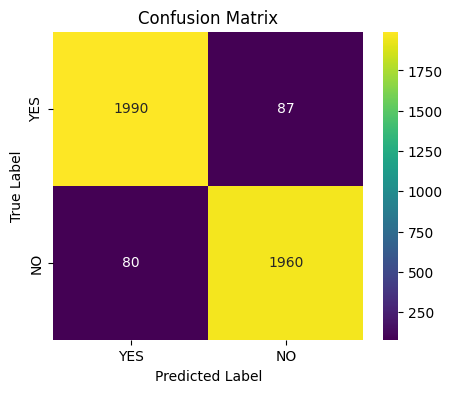

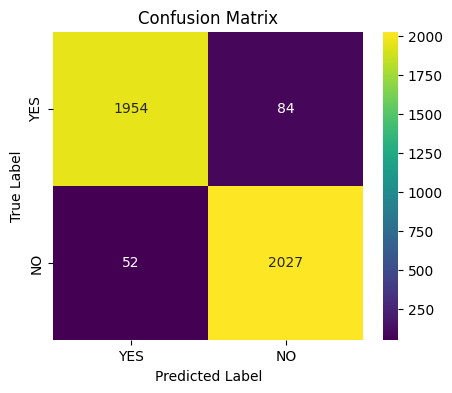

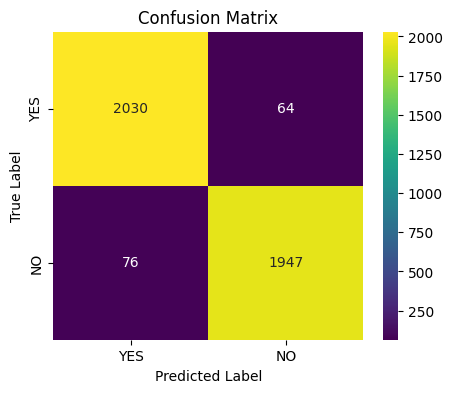

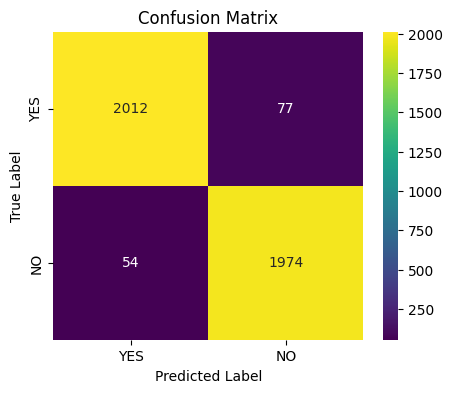

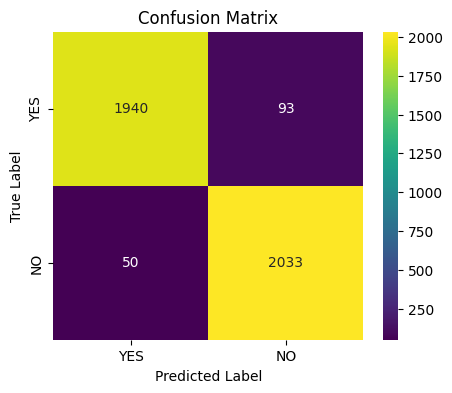

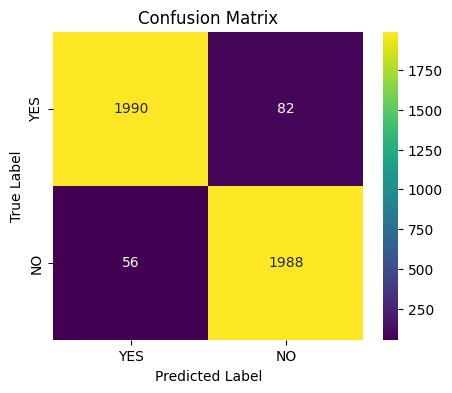

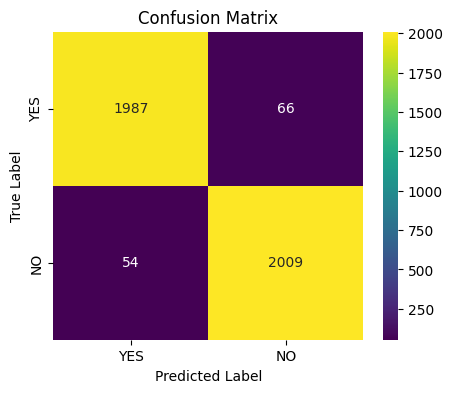

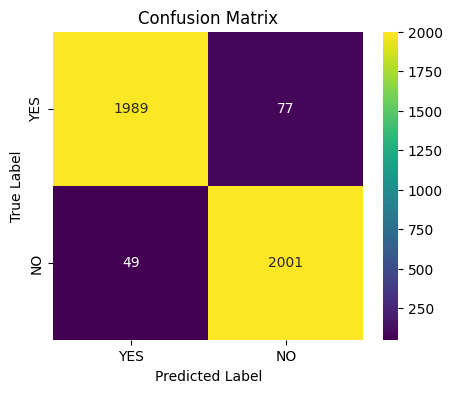

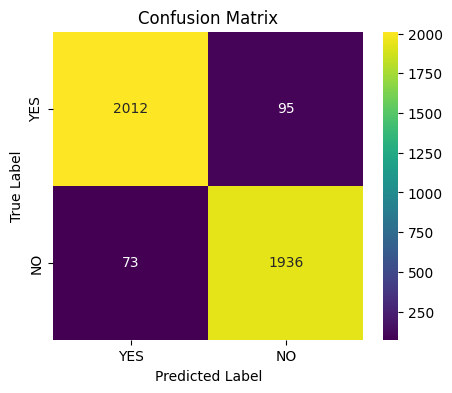

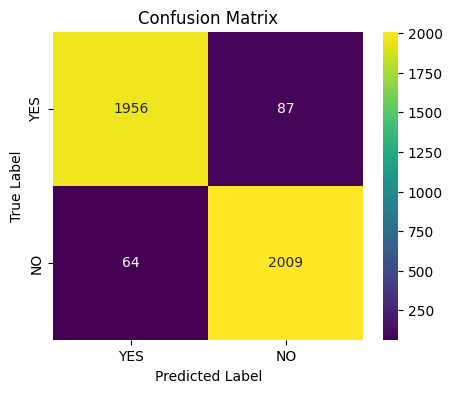

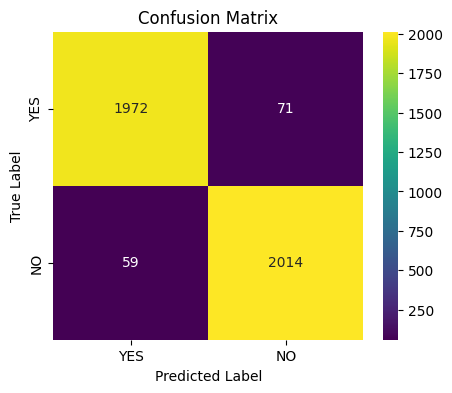

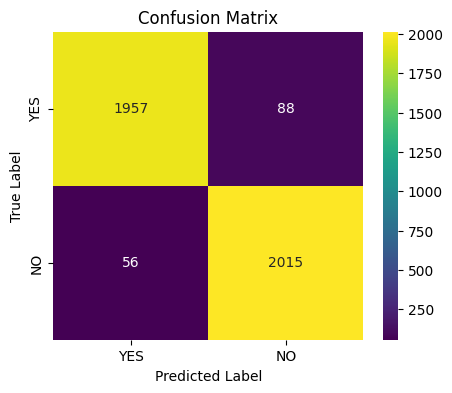

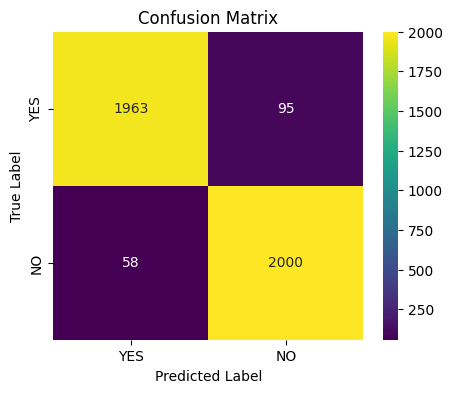

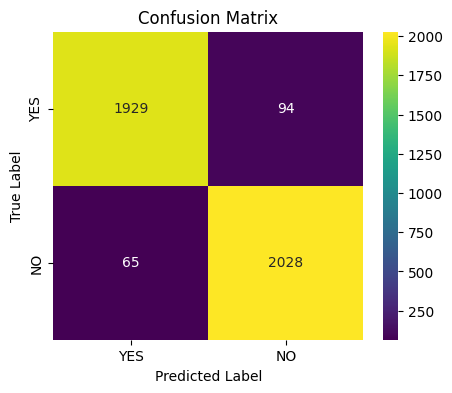

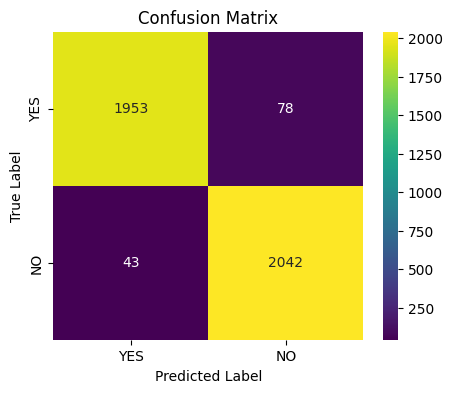

Precision: 0.9656436072737132
Recall: 0.9655256821421961
F1 score: 0.9655435159314909
Training time: 20.349070262908935
Inference time: 0.16969402631123862
The best model is 6 with F1 score is 0.9708446481111002


In [20]:
def RandomForest():
    k_fold = KFold(n_splits=15, shuffle=True, random_state=42)
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []
    inference_times = []
    models = []  # To store the trained models for each fold

    for fold_idx, (train_indices, test_indices) in enumerate(k_fold.split(X)):
        # Chia dữ liệu thành tập huấn luyện và tập kiểm thử
        X_train = X.iloc[train_indices]
        X_test = X.iloc[test_indices]
        y_train = y.iloc[train_indices]
        y_test = y.iloc[test_indices]

        # Khởi tạo mô hình
        model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=100,  min_samples_split=3, min_samples_leaf=6, random_state=42)

        start_time = time.time() # Bắt đầu đo thời gian
        model.fit(X_train, y_train) # Huấn luyện mô hình
        training_time = time.time() - start_time # Dừng đo thời gian
        training_times.append(training_time)

        start_time = time.time() # Bắt đầu đo thời gian
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time # Dừng đo thời gian
        inference_times.append(inference_time)

        # Đánh giá độ chính xác
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        models.append(model)

        # Tính toán confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["YES", "NO"], yticklabels=["YES", "NO"])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_inference_time = np.mean(inference_times)
    print("Precision:", average_precision)
    print("Recall:", average_recall)
    print("F1 score:", average_f1)
    print("Training time:", average_training_time)
    print("Inference time:", average_inference_time)

    max_f1, index = max((value, index) for index, value in enumerate(f1_scores))
    print("The best model is", index, "with F1 score is", max_f1)

RandomForest()